Join the data from Part 1 with the data from Part 2 to create a new dataframe.

In [20]:
# imports
import pandas as pd   

data_foursquare = pd.read_csv("../Downloads/foursquare_details.csv")  
data_yelp = pd.read_csv("../Downloads/yelp_details.csv") 
df_barcelona2 = pd.read_csv("../Downloads/barcelona_bikes.csv")           

In [21]:
#Join the data from Part 1 with the data from Part 2 to create a new dataframe.
data_fy_join = pd.merge(data_foursquare, data_yelp, on=['Latitude','Longitude'])
data_all = pd.merge(data_foursquare, df_barcelona2, on=['Latitude','Longitude']) #Used only foursquare data for subsequent analysis
data_all   

,Latitude,Longitude,Average_dist_F,Average_popularity_F,Average_rating_F,Max_rating_F,Max_popularity_F,Min_rating_F,Min_popularity_F,Station Name,Number of Bikes
0,41.388125,2.195187,672.1,0.989190,8.95,9.3,0.999424,8.7,0.974153,"C/ MARINA, 25-33",20
1,41.436687,2.169313,840.8,0.832867,8.39,8.6,0.983477,8.2,0.253076,"C/ MARIE CURIE, 8-14",1
2,41.409135,2.208818,711.7,0.979793,8.66,9.1,0.996431,8.4,0.961178,"C/ SELVA DE MAR, 46",10
3,41.389462,2.131495,549.4,0.965750,8.78,9.0,0.998280,8.6,0.924402,"AV. DIAGONAL, 652",2
4,41.391767,2.153216,760.7,0.989222,9.23,9.4,0.999966,9.1,0.944547,"C/ CÒRSEGA, 216",0
...,...,...,...,...,...,...,...,...,...,...,...
501,41.416793,2.205834,562.5,0.845017,8.03,8.5,0.976448,7.7,0.046271,"GRAN VIA DE LES CORTS CATALANES, 1118",6
502,41.410801,2.187244,480.8,0.956308,8.74,8.9,0.992382,8.6,0.888011,"C/ VALÈNCIA, 621",14
503,41.380318,2.154437,646.4,0.988085,9.18,9.4,0.999932,9.1,0.968309,"C/ CALÀBRIA, 112",35
504,41.362123,2.135619,651.6,0.970252,8.49,9.0,0.986369,8.1,0.899130,"C/ JANE ADDAMS, 26/ CRTA. DEL PRAT",24


Provide a visualization that you used as part of your EDA process. Explain the initial pattern or relationship you discoved through this visualization. 

In [22]:
import matplotlib.pyplot as plt
import seaborn as sns  

/opt/anaconda3/lib/python3.9/site-packages/seaborn/axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


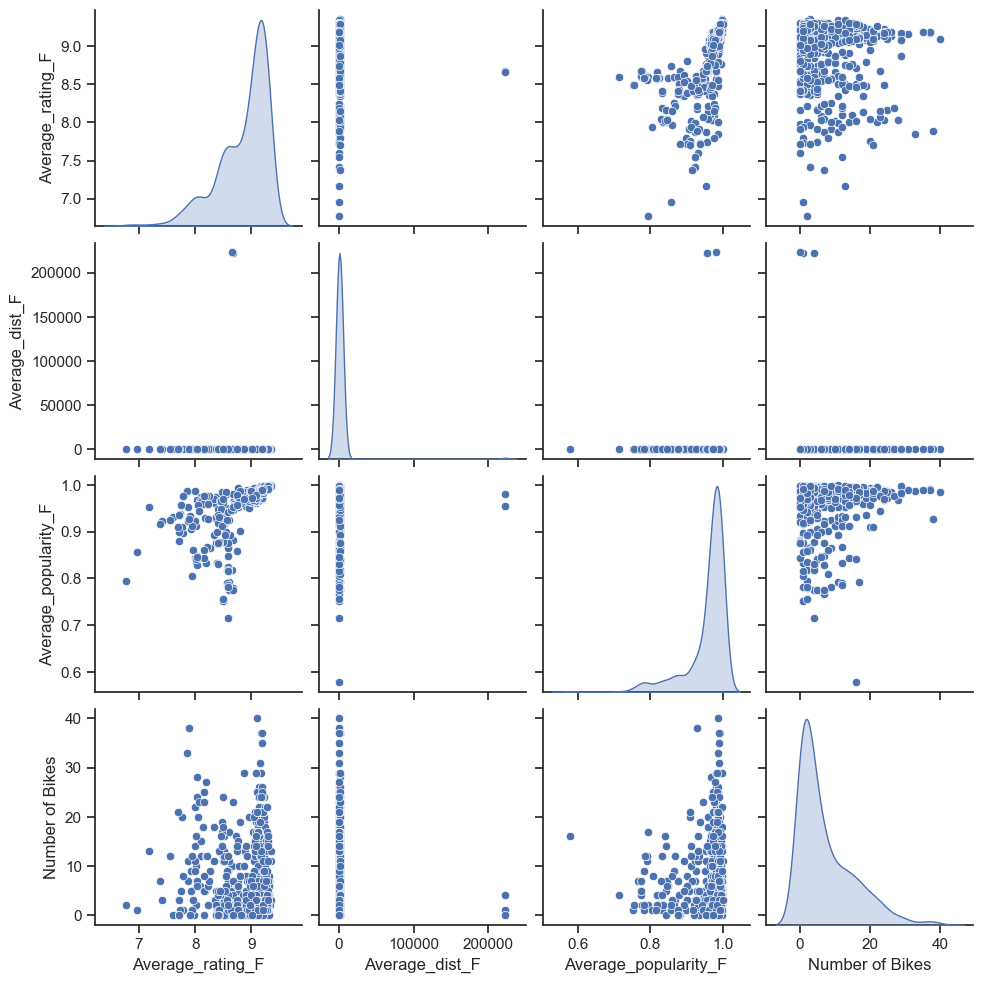

In [25]:
#Used only foursquare data for subsequent analysis
sns.set(style="ticks", color_codes=True)
sns.pairplot(data_all, diag_kind="kde", vars=['Average_rating_F','Average_dist_F','Average_popularity_F','Number of Bikes'])
plt.savefig('../Downloads/pairplot.jpeg', dpi=300, bbox_inches='tight')
plt.show()      

In [27]:
columns_set = data_all[['Average_rating_F','Average_dist_F','Average_popularity_F','Number of Bikes']]   

In [30]:
# Create a path for the csv data
csv_file_path = "../Downloads/allcolumns.csv"

# Save the DataFrame to CSV
columns_set.to_csv(csv_file_path, index=False)   

In [29]:
correlation_matrix = columns_set.corr(numeric_only=True)
correlation_matrix  

,Average_rating_F,Average_dist_F,Average_popularity_F,Number of Bikes
Average_rating_F,1.000000,-0.033493,0.609697,-0.010729
Average_dist_F,-0.033493,1.000000,0.011345,-0.055806
Average_popularity_F,0.609697,0.011345,1.000000,0.121143
Number of Bikes,-0.010729,-0.055806,0.121143,1.000000


# Database

Put all your results in an SQLite3 database (remember, SQLite stores its databases as files in your local machine - make sure to create your database in your project's data/ directory!)

In [31]:
import sqlite3
from sqlite3 import Error  

In [37]:
def create_connection(path):
    connection = None
    try:
        connection = sqlite3.connect(path)
        print("Connection to SQLite DB successful")
    except Error as e:
        print(f"The error '{e}' occurred")

    return connection  

In [42]:
 connection_data = create_connection("../Downloads/bikes_poi.sqlite")

# Write the DataFrames to the database
data_foursquare.to_sql('foursquare', connection_data, if_exists='replace', index=False)
data_yelp.to_sql('yelp', connection_data, if_exists='replace', index=False)
df_barcelona2.to_sql('bikes', connection_data, if_exists='replace', index=False)

# Close database connection
connection_data.close()     

Connection to SQLite DB successful


In [45]:
def implement_query(connection_data, query):
    cursor = connection_data.cursor()
    result = None
    try:
        cursor.execute(query)
        result = cursor.fetchall()
        return result
    except Error as e:
        print(f"The error '{e}' occurred")  

In [46]:
connection_data = create_connection("../Downloads/bikes_poi.sqlite")

select_bikes = "SELECT * FROM bikes"
bikes = implement_query(connection_data, select_bikes)

for station in bikes:
    print(station)

connection_data.close()  

Connection to SQLite DB successful
('C/ MARINA, 25-33', 41.3881248, 2.1951871, 20)
('C/ MARIE CURIE, 8-14', 41.4366871, 2.1693134, 1)
('C/ SELVA DE MAR, 46', 41.4091355, 2.2088179, 10)
('AV. DIAGONAL, 652', 41.389462, 2.1314948, 2)
('C/ CÒRSEGA, 216', 41.3917666, 2.1532163, 0)
('C/ CARDENAL TEDESCHINI, 13', 41.4253643, 2.1852073, 4)
("RAMBLA DE L'ONZE DE SETEMBRE, 69", 41.4299999, 2.190246, 11)
('C/ DURAN I BAS, 2', 41.3854094, 2.1740155, 4)
('PG. TORRAS I BAGES, 129', 41.4433647, 2.1906302, 9)
('GRAN VIA DE LES CORTS CATALANES, 902', 41.4075013, 2.1930174, 0)
('C/ GÒNGORA, 23', 41.4432762, 2.1746238, 1)
('C/ GRAN DE LA SAGRERA, 74', 41.4230551, 2.1913753, 11)
('C/ SANT ISCLE, 60', 41.433384, 2.1716309, 1)
('C/ MALLORCA, 41-43', 41.3834802, 2.1482099, 2)
('C/ FULTON, 1', 41.4297231, 2.1617032, 1)
('RECINTE PARC DE LA CIUTADELLA', 41.3873901, 2.1875446, 6)
('C/ SANT OLEGUER, 2', 41.3775319, 2.1707321, 12)
('RAMBLA DEL RAVAL, 20', 41.3781065, 2.1696744, 17)
('RAMBLA DEL BRASIL, 44', 41.3

Look at the data before and after the join to validate your data.